In [2]:
import numpy as np
import pandas as pd

In [3]:
train_a = pd.read_csv('data/train/TRAIN_A.csv')
train_b = pd.read_csv('data/train/TRAIN_B.csv')

# Case of A

In [63]:
train_a.head()

,timestamp,Q1,Q2,Q3,Q4,Q5,M1,M2,M3,M4,...,P17_flag,P18_flag,P19_flag,P20_flag,P21_flag,P22_flag,P23_flag,P24_flag,P25_flag,P26_flag
0,24/05/27 00:00,17880,37151.001,24834.001,6321,85828,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,24/05/27 00:01,17970,37069.001,25016.001,6367,85212,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,24/05/27 00:02,17280,37345.000,24462.000,6431,85655,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,24/05/27 00:03,17280,37345.000,24462.000,6431,85619,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,24/05/27 00:04,17920,37075.000,24896.001,6206,85619,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [64]:
train_a.columns

Index(['timestamp', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'M1', 'M2', 'M3', 'M4', 'M5',
       'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'P1', 'P2',
       'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13',
       'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23',
       'P24', 'P25', 'P26', 'anomaly', 'P1_flag', 'P2_flag', 'P3_flag',
       'P4_flag', 'P5_flag', 'P6_flag', 'P7_flag', 'P8_flag', 'P9_flag',
       'P10_flag', 'P11_flag', 'P12_flag', 'P13_flag', 'P14_flag', 'P15_flag',
       'P16_flag', 'P17_flag', 'P18_flag', 'P19_flag', 'P20_flag', 'P21_flag',
       'P22_flag', 'P23_flag', 'P24_flag', 'P25_flag', 'P26_flag'],
      dtype='object')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

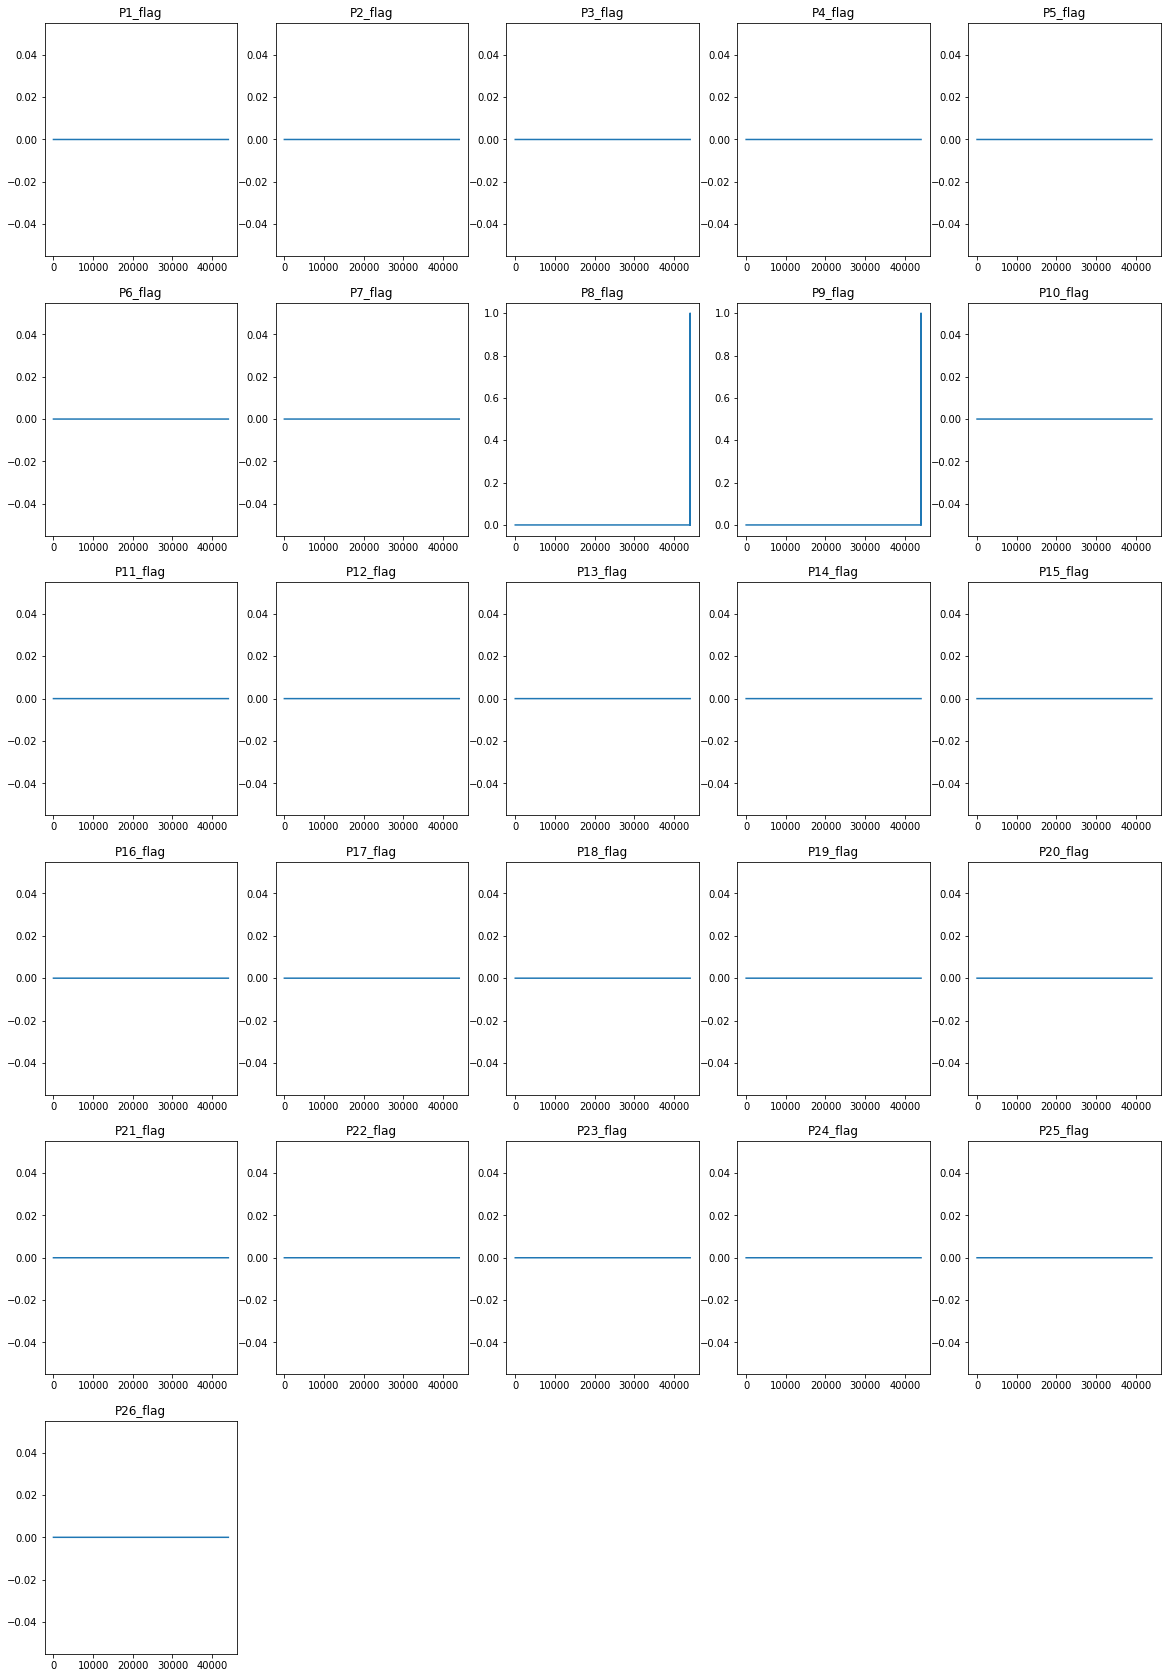

In [57]:
plt.figure(figsize=(20, 30))
# plt.figure(0)
for i in range(26):
    target_pressure = f'P{i+1}_flag'
    plt.subplot(6, 5, i+1)
    plt.plot(train_a[target_pressure])
    plt.title(target_pressure)
    


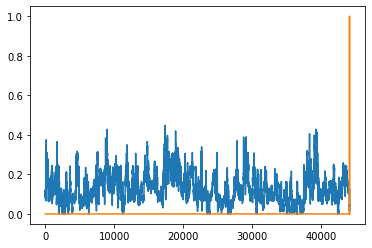

In [50]:
plt.plot(train_a['P8'])
plt.plot(train_a['P8_flag'])
# plt.plot(train_a['Q4'])


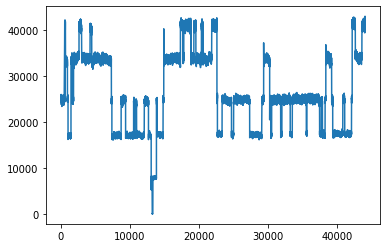

In [11]:
plt.plot(train_a['Q3'])


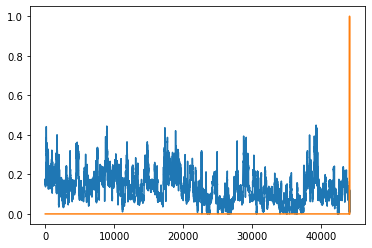

In [8]:
plt.plot(train_a['P9'])
plt.plot(train_a['P9_flag'])


- 이상은 8, 9에서만 관찰됨
- 그 중에서도 극 후반부에서만 발견
- 영향을 줄 만한 요소를 발견하기 위해, 8(9)에 도달하기 전의 유량 및 압력들을 살펴볼 것
- 참고로 P8_flag와 P9_flag는 값이 동일

## 유량

<Figure size 432x288 with 0 Axes>

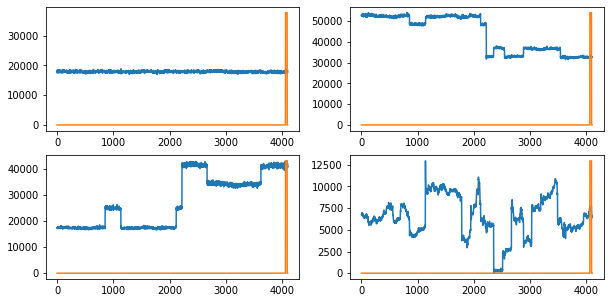

In [48]:
plt.figure(0)
plt.figure(figsize=(10, 5))
for i in range(4):
    target = f'Q{i+1}'
    plt.subplot(2, 2, i+1)
    plt.plot(np.array(train_a[target])[40000:])
    plt.plot(np.array(train_a['P9_flag'])[40000:] * np.max(train_a[target]))
    # plt.show()

## 펌프 가동 정보

<Figure size 432x288 with 0 Axes>

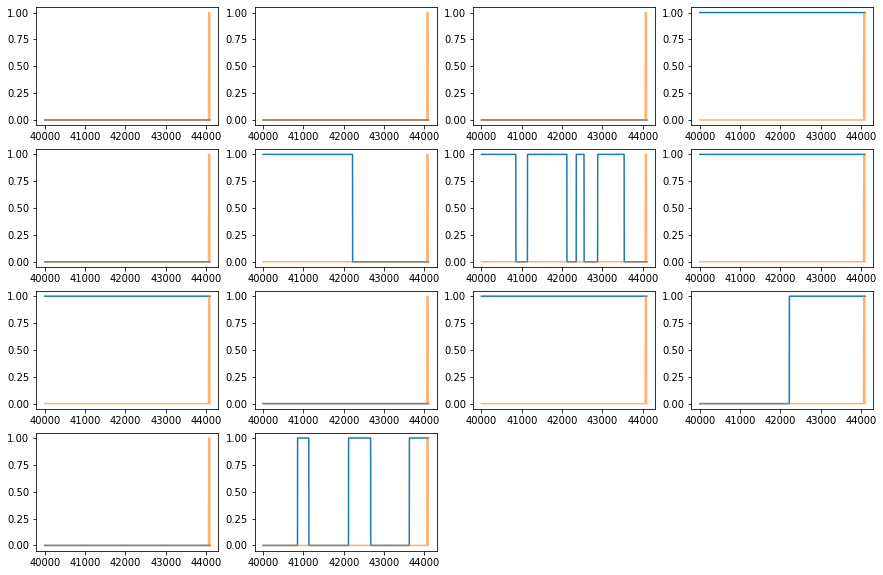

In [47]:
plt.figure(0)
plt.figure(figsize=(15, 10))
for i in range(14):
    target = f'M{i+1}'
    plt.subplot(4, 4, i+1)
    plt.plot(train_a[target][40000:])
    plt.plot(train_a['P9_flag'][40000:], alpha=0.6)
    # plt.show()

## 압력계 정보

<Figure size 432x288 with 0 Axes>

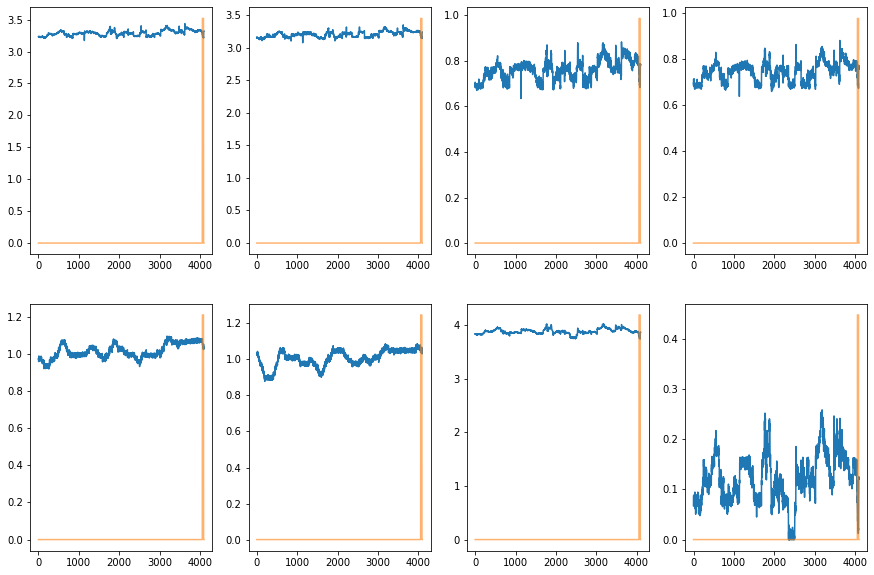

In [49]:
plt.figure(0)
plt.figure(figsize=(15, 10))
for i in range(8):
    target = f'P{i+1}'
    plt.subplot(2, 4, i+1)
    plt.plot(np.array(train_a[target])[40000:])
    plt.plot(np.array(train_a['P9_flag'])[40000:] * np.max(train_a[target]), alpha=0.6)
    # plt.show()

- 다른 압력계에서도 급락하는 구간들이 있음
- 그런데 오직 8, 9에서만 누수 판정을 받은 이유가 있을 텐데 이것을 알아내느 것이 핵심

In [37]:
train_b.head()

,timestamp,Q1,Q2,Q3,Q4,P1,P2,P3,P4,P5,...,P1_flag,P2_flag,P3_flag,P4_flag,P5_flag,P6_flag,P7_flag,P8_flag,P9_flag,P10_flag
0,24/07/01 00:00,29277.5000,7387.1660,12025,9522.8721,4.990,3.6862,3.6875,3.9337,4.0850,...,0,0,0,0,0,0,0,0,0,0
1,24/07/01 00:01,28694.5293,7378.3496,11855,9555.6641,4.990,3.6862,3.6925,3.9313,4.0813,...,0,0,0,0,0,0,0,0,0,0
2,24/07/01 00:02,28814.8457,7399.6729,12005,9555.6641,4.965,3.6875,3.6888,3.9313,4.0837,...,0,0,0,0,0,0,0,0,0,0
3,24/07/01 00:03,29249.0625,7321.3125,12136,9451.0967,4.990,3.6875,3.6950,3.9288,4.0800,...,0,0,0,0,0,0,0,0,0,0
4,24/07/01 00:04,30138.2793,7315.5610,12158,9451.0967,4.990,3.6850,3.7037,3.9331,4.0887,...,0,0,0,0,0,0,0,0,0,0


In [39]:
train_b.columns

Index(['timestamp', 'Q1', 'Q2', 'Q3', 'Q4', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6',
       'P7', 'P8', 'P9', 'P10', 'anomaly', 'P1_flag', 'P2_flag', 'P3_flag',
       'P4_flag', 'P5_flag', 'P6_flag', 'P7_flag', 'P8_flag', 'P9_flag',
       'P10_flag'],
      dtype='object')

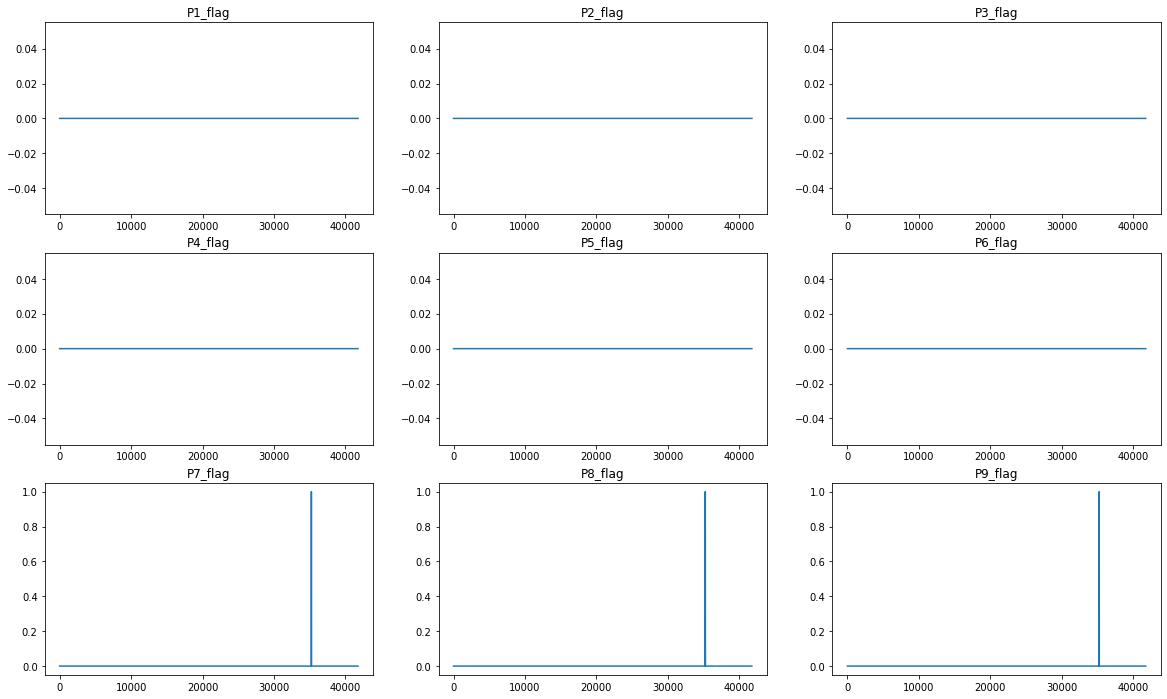

In [62]:
plt.figure(figsize=(20, 12))
for i in range(9):
    target_pressure = f'P{i+1}_flag'
    plt.subplot(3, 3, i+1)
    plt.plot(train_b[target_pressure])
    plt.title(target_pressure)
